# FAF.FIA16.1 -- Artificial Intelligence Fundamentals

> **Lab 3:** Linear Regression \\
> **Performed by:** Cambur Dumitru, group FAF-191 \\
> **Verified by:** Mihail Gavrilita





## Imports and Utils

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from const import Constants
from utils import test_model, get_test, histograms, correlation, scatter


## Task 1 -- Import your data. Analyze it via common statistical approaches. Cleanse the data if necessary.

In [2]:
data = np.loadtxt("apartmentComplexData.txt", delimiter=",")
data = pd.DataFrame(data, columns=Constants.COLUMNS)

print("Column\t\t\tNull Count")
print(data.isna().sum())
print("----------------------------------------")

print("Duplicates: ", data.duplicated().sum())
print("----------------------------------------")


Column			Null Count
nrel1                 0
nrel2                 0
complexAge            0
totalRooms            0
totalBedrooms         0
complexInhabitants    0
apartmentsNr          0
nrel8                 0
medianComplexValue    0
dtype: int64
----------------------------------------
Duplicates:  0
----------------------------------------


First of all, analysis of nulls and duplicates for our dataset shows 0 in both cases. This means we won't have to fill/drop nulls/duplicates for our dataset.

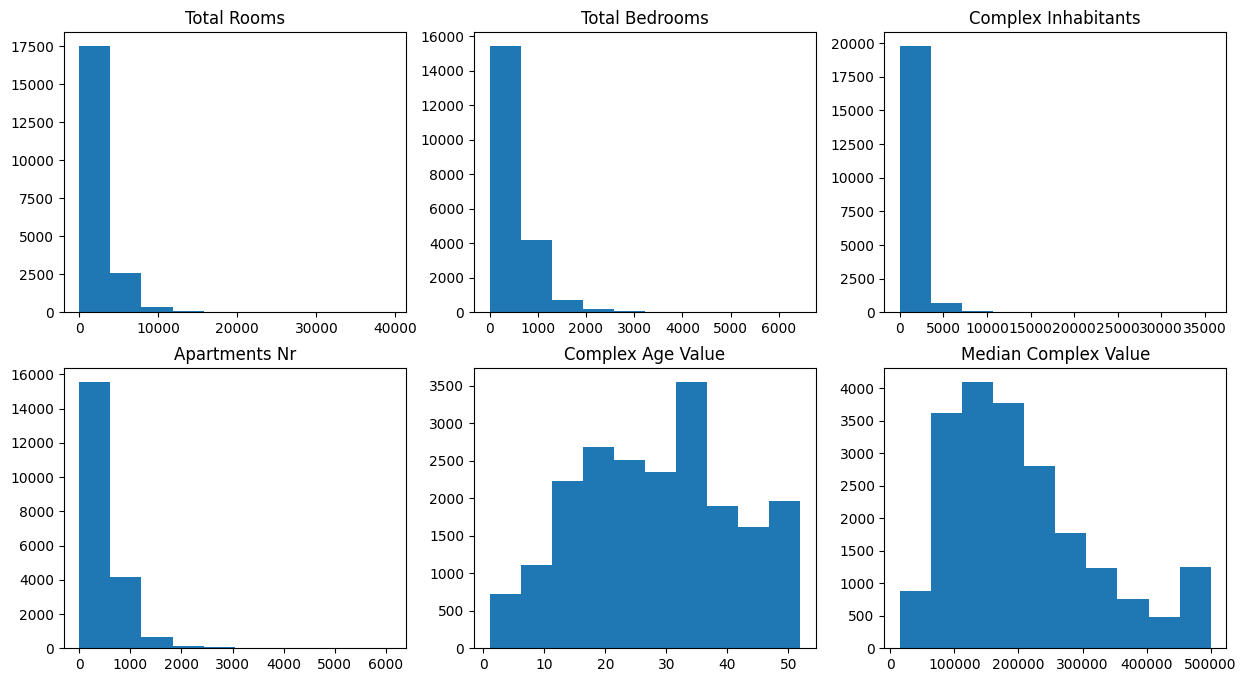

In [3]:
histograms(data, Constants)

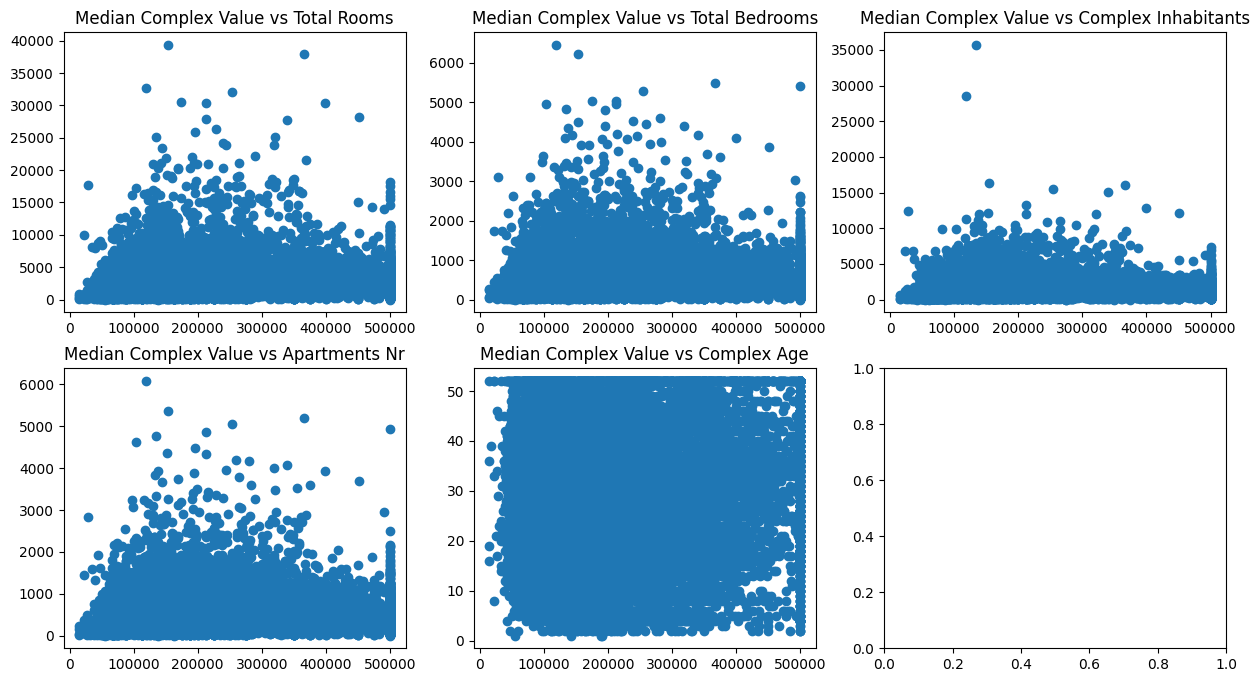

In [4]:
scatter(data, Constants)

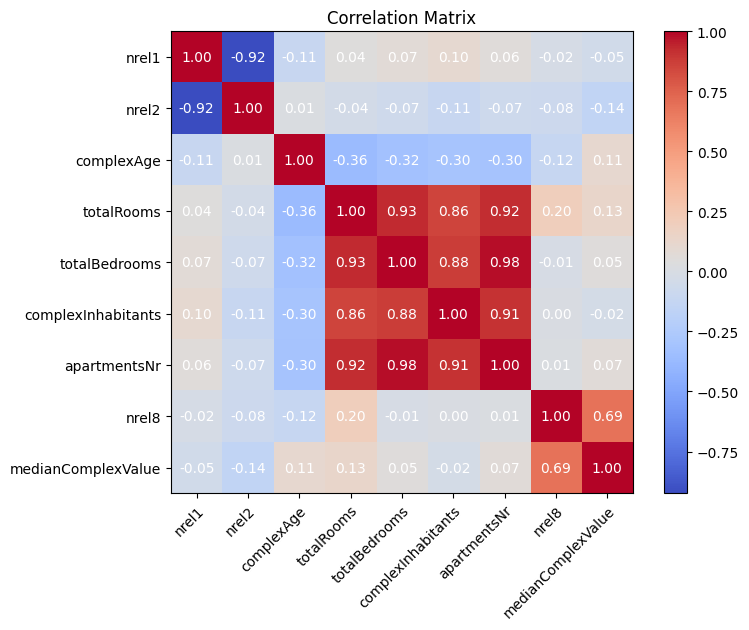

In [5]:
correlation(data, Constants.COLUMNS)

## Task 2 --  Train your model by applying linear regression.

In [21]:
x_train, x_test, y_train, y_test = get_test(data,
                                            Constants.MEDIAN_COMPLEX_VALUE)

regress_model = LinearRegression()
regress_model.fit(x_train, y_train)

test_model("Regress", regress_model, x_test, y_test)

Regress
MSE on test set: 4853781771.95
RMSE on test set: 69669.09
Prediction accuracy on test set: 0.63
-----------------------------------------------


## Task 3 -- Show the prediction power of your model by attempting to predict the price of a new house.

In [24]:
predict = regress_model.predict([[-130, 40.10, 64, 1360, 235, 550, 243, 5.4372]])
print(f"medianComplexValue: { predict[0]:.6f}")

medianComplexValue: 565407.016765


C:\Users\dcamb\PycharmProjects\FIA\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Task 4 --  Re-train your model. Use Ridge, Lasso or Elastic Net regularization.

In [25]:
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1, 10])
ridge_model.fit(x_train, y_train)

lasso_model = LassoCV(alphas=[0.01, 0.1, 1, 10])
lasso_model.fit(x_train, y_train)

elastic_net_model = ElasticNetCV(alphas=[0.01, 0.1, 1, 10])
elastic_net_model.fit(x_train, y_train)

test_model("Ridge", ridge_model, x_test, y_test)
test_model("Lasso", lasso_model, x_test, y_test)
test_model("Elastic Net", elastic_net_model, x_test, y_test)

Ridge
MSE on test set: 4853826519.97
RMSE on test set: 69669.41
Prediction accuracy on test set: 0.63
-----------------------------------------------
Lasso
MSE on test set: 4853798036.94
RMSE on test set: 69669.20
Prediction accuracy on test set: 0.63
-----------------------------------------------
Elastic Net
MSE on test set: 4854428053.97
RMSE on test set: 69673.73
Prediction accuracy on test set: 0.63
-----------------------------------------------


## Task 5 -- Score and compare the scores of the models you have implemented. Interpret the result.

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

Underfitting is then model doesn't give accurate predictions for both training and new data

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

By comparing three of these functions, though it is not easily seen on the output, best working model should be based on Lasso Regularization, as generally closer RMSE is to the original model, the better it is.

## Task 6 -- During your work, provide visualizations that would help better understand your data, your results etc.

## Conclusions:

During this lab work I have learnt next terminology: correlation, multicollinearity, linear regression, ridge/lasso/elastic net regularization, cost function, mean square error and etc. Also, based on the knowledge I've received I trained a model, analyzed and have found its overtting problem and ultimately applied regularization techniques to solve them.    

## Bibliography:

https://medium.com/analytics-vidhya/correlation-and-machine-learning-fee0ffc5faac

https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b5

https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c

https://www.analyticsvidhya.com/blog/2021/08/performance-comparision-of-regularized-and-unregularized-regression-models/
